In [1]:
"""
Stream Tweets from Twitter API and analyse data inspired by NLP approaches by 'AlexTheAnalyst'.
GitHub: https://github.com/AlexTheAnalyst
"""

# !pip install tweepy
# !pip install pandas

import tweepy
import pandas as pd 

In [2]:
# Credential information for Twitter API connection. Real information removed because of privacy and safety reasons.

CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN = "" 
ACCESS_TOKEN_SECRET = ""

In [3]:
# Connect to API to get data.

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [4]:
# Test Cursor to check structure of data. Analysing data from Twitter User 'BarackObama'.

cursor = tweepy.Cursor(api.user_timeline, id="BarackObama", tweet_mode="extended").items(1)

In [5]:
# Check structure of data from API using dir() method.

for i in cursor:
    print(dir(i))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'display_text_range', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'truncated', 'user']


In [6]:
# Enter number of Tweets to analyse.

number_of_tweets = int(input("Please enter number of Tweets to analyse: "))

Please enter number of Tweets to analyse: 250


In [7]:
# Create lists for specific data.

tweets = []
likes = []
time = []
lang = []
source = []

# Fill lists with data found by Cursor.

for i in tweepy.Cursor(api.user_timeline, id="BarackObama", tweet_mode="extended").items(number_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)
    lang.append(i.lang)
    source.append(i.source)

In [8]:
# Create dataframe with lists.

data_frame = pd.DataFrame({"tweets":tweets, "likes":likes, "time":time, "lang":lang, "source":source})

In [9]:
data_frame

,tweets,likes,time,lang,source
0,"Through his extraordinary example, His Royal H...",220278,2021-04-09 16:15:38,en,Twitter Web App
1,The only way we’ll be able to beat this pandem...,35701,2021-04-06 19:03:10,en,Twitter Media Studio
2,Bruce @Springsteen and I close out our podcast...,31968,2021-04-05 21:00:41,en,Twitter for iPhone
3,Read about other developments from communities...,5439,2021-04-05 15:16:12,en,Twitter Web App
4,More places are experimenting with programs th...,26595,2021-04-05 15:16:12,en,Twitter Web App
...,...,...,...,...,...
245,Joe and Kamala have what it takes to lead this...,27070,2020-09-02 16:00:18,en,Twitter for iPhone
246,.@JoeBiden is a man who learned to treat every...,98391,2020-09-02 16:00:01,en,Twitter Media Studio
247,If you can volunteer as a poll worker for earl...,47081,2020-09-01 16:04:19,en,Twitter for iPhone
248,Chadwick came to the White House to work with ...,845978,2020-08-29 14:39:43,en,Twitter for iPhone


In [10]:
# Filter out Retweets and restart the indexing with ascending order.

data_frame = data_frame[~data_frame.tweets.str.contains("RT")]
data_frame = data_frame.reset_index(drop=True)

In [11]:
data_frame

,tweets,likes,time,lang,source
0,"Through his extraordinary example, His Royal H...",220278,2021-04-09 16:15:38,en,Twitter Web App
1,The only way we’ll be able to beat this pandem...,35701,2021-04-06 19:03:10,en,Twitter Media Studio
2,Bruce @Springsteen and I close out our podcast...,31968,2021-04-05 21:00:41,en,Twitter for iPhone
3,Read about other developments from communities...,5439,2021-04-05 15:16:12,en,Twitter Web App
4,More places are experimenting with programs th...,26595,2021-04-05 15:16:12,en,Twitter Web App
...,...,...,...,...,...
226,Joe and Kamala have what it takes to lead this...,27070,2020-09-02 16:00:18,en,Twitter for iPhone
227,.@JoeBiden is a man who learned to treat every...,98391,2020-09-02 16:00:01,en,Twitter Media Studio
228,If you can volunteer as a poll worker for earl...,47081,2020-09-01 16:04:19,en,Twitter for iPhone
229,Chadwick came to the White House to work with ...,845978,2020-08-29 14:39:43,en,Twitter for iPhone


In [12]:
# Get the 5 most liked Tweets.

most_liked = data_frame.loc[data_frame.likes.nlargest(5).index]

In [13]:
most_liked

,tweets,likes,time,lang,source
71,"Congratulations to my friend, President @JoeBi...",2817904,2021-01-20 14:45:13,en,Twitter for iPhone
74,"Happy birthday to my love, my partner, and my ...",1922194,2021-01-17 14:00:40,en,Twitter for iPhone
121,"Congratulations to my friends, @JoeBiden and @...",1506828,2020-11-07 18:03:22,en,Twitter Web App
138,Shoot your shot. https://t.co/XdZz4dh82T https...,1025018,2020-10-31 23:17:56,en,Twitter Media Studio
57,Happy Valentine’s Day to the three who never f...,935845,2021-02-14 14:01:17,en,Twitter for iPhone


In [14]:
# !python -m spacy download en
# !pip install -U spacy
# !python -m pip install seaborn

import matplotlib.pyplot as plt
import re
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns

In [15]:
# Create list of sentences.

list_of_sentences = [sentence for sentence in data_frame.tweets]

# Split sentences into words.

lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [16]:
print(lines)

['Through', 'his', 'extraordinary', 'example,', 'His', 'Royal', 'Highness', 'Prince', 'Philip', 'proved', 'that', 'true', 'partnership', 'has', 'room', 'for', 'both', 'ambition', 'and', 'selflessness', '—', 'all', 'in', 'service', 'of', 'something', 'greater.', 'Our', 'thoughts', 'are', 'with', 'Her', 'Majesty', 'the', 'Queen,', 'the', 'Royal', 'Family,', 'and', 'the', 'British', 'people.', 'https://t.co/qbH2ycbcaA', 'The', 'only', 'way', 'we’ll', 'be', 'able', 'to', 'beat', 'this', 'pandemic', 'is', 'if', 'enough', 'people', 'get', 'vaccinated.', 'So', 'join', 'me,', 'Michelle,', 'and', 'Americans', 'everywhere', 'in', 'getting', 'the', 'COVID-19', 'vaccine', 'as', 'soon', 'as', 'it’s', 'available', 'to', 'you—and', 'encourage', 'your', 'friends', 'and', 'family', 'to', 'do', 'the', 'same.', 'https://t.co/HSjb2DUl4u', 'https://t.co/4CT0fyRHou', 'Bruce', '@Springsteen', 'and', 'I', 'close', 'out', 'our', 'podcast,', 'Renegades:', 'Born', 'in', 'the', 'USA,', 'back', 'where', 'it', 'all

In [17]:
# Clean Tweets and remove punctuation.

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines_cleaned = []

for word in lines:
    if word != '':
        lines_cleaned.append(word)

In [18]:
# Stemming words to their word root. 

# !python -m pip install nltk
# !python -m pip install nltk.stem

from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires a language parameter.

s_stemmer = SnowballStemmer(language='english')

stem_to_word_root = []
for word in lines_cleaned:
    stem_to_word_root.append(s_stemmer.stem(word))

In [19]:
print(stem_to_word_root)

['through', 'his', 'extraordinari', 'exampl', 'his', 'royal', 'high', 'princ', 'philip', 'prove', 'that', 'true', 'partnership', 'has', 'room', 'for', 'both', 'ambit', 'and', 'selfless', 'all', 'in', 'servic', 'of', 'someth', 'greater', 'our', 'thought', 'are', 'with', 'her', 'majesti', 'the', 'queen', 'the', 'royal', 'famili', 'and', 'the', 'british', 'peopl', 'httpstcoqbh2ycbcaa', 'the', 'onli', 'way', 'well', 'be', 'abl', 'to', 'beat', 'this', 'pandem', 'is', 'if', 'enough', 'peopl', 'get', 'vaccin', 'so', 'join', 'me', 'michell', 'and', 'american', 'everywher', 'in', 'get', 'the', 'covid19', 'vaccin', 'as', 'soon', 'as', 'it', 'avail', 'to', 'youand', 'encourag', 'your', 'friend', 'and', 'famili', 'to', 'do', 'the', 'same', 'httpstcohsjb2dul4u', 'httpstco4ct0fyrhou', 'bruce', 'springsteen', 'and', 'i', 'close', 'out', 'our', 'podcast', 'renegad', 'born', 'in', 'the', 'usa', 'back', 'where', 'it', 'all', 'began', 'with', 'a', 'convers', 'about', 'the', 'stori', 'of', 'america', 'and

In [20]:
# Removing all Stop Words.

stem_stop_words = []

for word in stem_to_word_root:
    if word not in nlp.Defaults.stop_words:
        stem_stop_words.append(word)

In [21]:
print(stem_stop_words)

['extraordinari', 'exampl', 'royal', 'high', 'princ', 'philip', 'prove', 'true', 'partnership', 'room', 'ambit', 'selfless', 'servic', 'someth', 'greater', 'thought', 'majesti', 'queen', 'royal', 'famili', 'british', 'peopl', 'httpstcoqbh2ycbcaa', 'onli', 'way', 'abl', 'beat', 'pandem', 'peopl', 'vaccin', 'join', 'michell', 'american', 'everywher', 'covid19', 'vaccin', 'soon', 'avail', 'youand', 'encourag', 'friend', 'famili', 'httpstcohsjb2dul4u', 'httpstco4ct0fyrhou', 'bruce', 'springsteen', 'close', 'podcast', 'renegad', 'born', 'usa', 'began', 'convers', 'stori', 'america', 'restor', 'faith', 'promis', 'listen', 'final', 'episod', 'spotifi', 'httpstcokwmdc2yblv', 'httpstconknhrvbwwi', 'read', 'develop', 'communiti', 'work', 'togeth', 'reimagin', 'polic', 'recent', 'mbkallianc', 'report', 'httpstcoklbjeg9ipq', 'place', 'experi', 'program', 'send', 'civilian', 'respond', 'instead', 'polic', 'help', 'peopl', 'experienc', 'mental', 'health', 'crise', 'promis', 'develop', 'law', 'enforc

In [22]:
data_frame_top_words = pd.DataFrame(stem_stop_words)

data_frame_top_words = data_frame_top_words[0].value_counts()

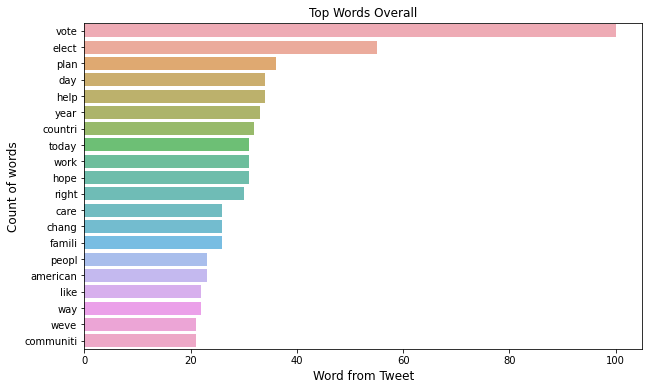

In [40]:
# This is a simple plot that shows the top 20 words being used.

data_frame_top_words = data_frame_top_words[:20,]
plt.figure(figsize=(10, 6))
sns.barplot(y=data_frame_top_words.index, x=data_frame_top_words.values, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Count of words', fontsize=12)
plt.xlabel('Word from Tweet', fontsize=12)
plt.show()

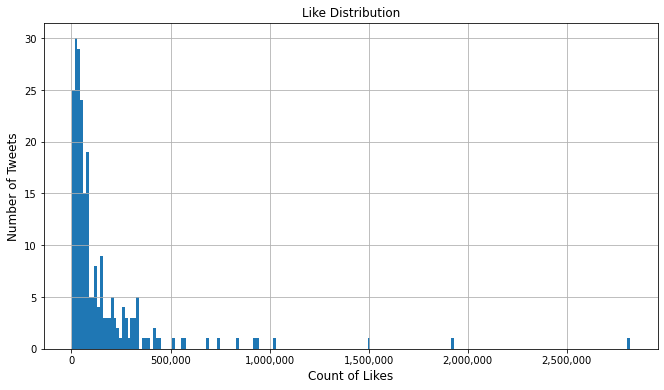

In [51]:
# Better approach to get Like Distribution for Tweets.
# Visualizes number of Tweets with specific Like Count.
import matplotlib


plt.figure(figsize = (11,6))
plt.ylabel('Number of Tweets', fontsize=12)
plt.xlabel('Count of Likes', fontsize=12)
plt.title('Like Distribution', fontsize=12)

ax = data_frame['likes'].hist(bins=200)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [26]:
# Calculate average like count with mean() method and return it.

average_like_count = data_frame['likes'].mean()

print("Like Count on average: " + str(average_like_count))

Like Count on average: 152444.658008658


In [27]:
# Create dataframe for Tweet Source Distribution.

data_frame_sources = pd.DataFrame(source)

data_frame_sources = data_frame_sources[0].value_counts()

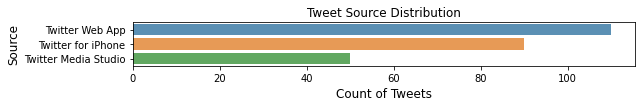

In [44]:
# Tweet Source Distribution visualization.

data_frame_sources = data_frame_sources[:10,]
plt.figure(figsize=(9, 0.8))
sns.barplot(y=data_frame_sources.index, x=data_frame_sources.values, alpha=0.8)
plt.title('Tweet Source Distribution')
plt.ylabel('Source', fontsize=12)
plt.xlabel('Count of Tweets', fontsize=12)
plt.show()

In [29]:
from spacy import displacy
from collections import Counter

In [30]:
# Processing to create label for Entity visualization.

str1 = " " 

stem_stop_words = str1.join(lines_cleaned)

stem_stop_words = nlp(stem_stop_words)

label = [(X.text, X.label_) for X in stem_stop_words.ents]

In [31]:
# Create dataframe for Top Persons Mentioned.

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'PERSON')

df7 = df7['Word'].value_counts()

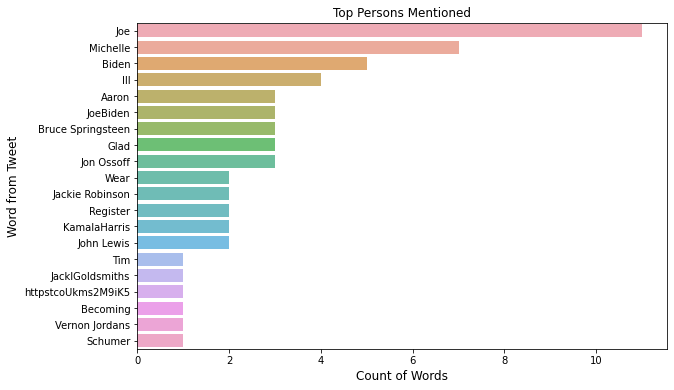

In [42]:
# Top Organizations Mentioned visualization.

df = df7[:20,]
plt.figure(figsize=(9.5, 6))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Top Persons Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [33]:
# Create dataframe for Top Organizations Mentioned.

df8 = pd.DataFrame(label, columns = ['Word','Entity'])

df8 = df6.where(df6['Entity'] == 'ORG')

df8 = df8['Word'].value_counts()

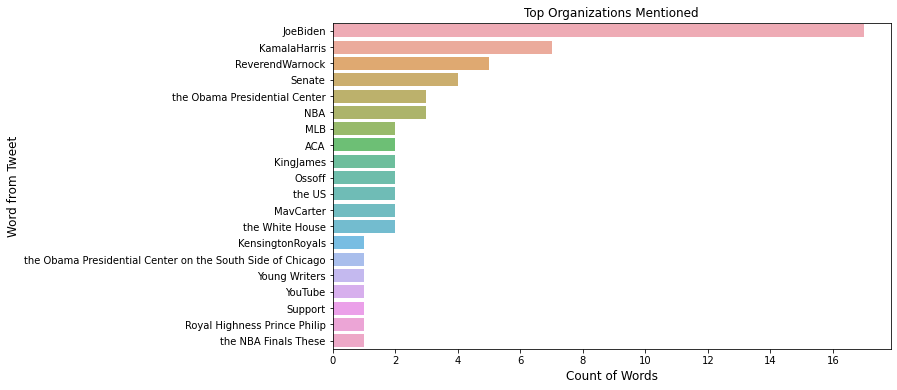

In [45]:
# Top Organizations Mentioned visualization.

df = df8[:20,]
plt.figure(figsize=(10, 6))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()